In [1]:
## Bring in needed mod, pandas
import pandas as pd, numpy as np
## Bring in matplot lib
from matplotlib import pyplot as plt
%matplotlib inline

## Set coloring and background
#plt.style.use(['dark_background','tableau-colorblind10'])
plt.style.use('tableau-colorblind10')

In [2]:
## Set file path name, from basic filtering. Should have basic.csv as the end
file_path = '/Users/croth/Downloads/Tecan-ssk1KO.csv'

In [3]:
## Bring in data
tecan = pd.read_csv(file_path)
## Drop blanks
tecan = tecan[(tecan.strain!='blank')]

In [4]:
## Convert files to numerics
tecan['amphB'] = [float(a[:-2]) for a in tecan.amphB]
tecan['temp'] = [int(a[:-1]) for a in tecan.temp]

In [5]:
## Gather unique strains
strains = tecan.strain.unique()
strains.shape

(21,)

In [6]:
strains

array(['431', 'XL280a', '1a-1', '1a-12', '4a-6', '4b-2', '5a-8', '5b-1',
       '431 F', 'XL F', 'H99', 'CM018', 'ssk1 CM018', 'SSK1 R',
       'XL280alpha', 'JEC21', '7b-14', '7b-16', '8b-9', 'JEC21 F',
       'ssk1 H99'], dtype=object)

In [7]:
## Gather backgrounds
backgrounds = tecan.background.unique()
backgrounds

array(['431', 'XL280a', 'none', 'XL280alpha', 'JEC21'], dtype=object)

In [8]:
## Get column names
colnames = tecan.columns.tolist()
## Get the first time pt index
zero_ix = colnames.index('0s')
## Seperate columns, info columns
infos = colnames[:zero_ix]
## Timpts
timepts = colnames[zero_ix:]
## Check work
assert timepts[0] == '0s'

In [9]:
## Set the first two timepoints to zero
tecan.loc[:,timepts[:2]] = 0

In [10]:
## Make the baseline dataframe, this is the first hour and a 15min, post the first half hour
baselinedf = tecan[timepts[2:7]].copy()

In [11]:
## Check shape of baseline dataframe
baselinedf.shape

(467, 5)

In [12]:
## Set all of those values in baseline near zero to above zero
baselinedf[baselinedf<0] = 0

In [13]:
## Calculate the per sample baseline
baselines = baselinedf.mean(axis=1).values

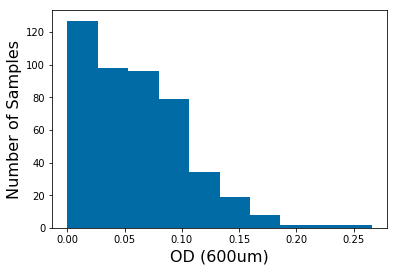

In [14]:
## Plot histogram of baseline values
plt.hist(baselines);
plt.ylabel('Number of Samples',fontsize=16);
plt.xlabel('OD (600um)',fontsize=16);

In [15]:
## Subtract baselines
tecan_tpt = tecan[timepts].T.subtract(baselines).T

In [16]:
## Set values below zero in baselined data to zero
tecan_tpt[tecan_tpt<0] = 0

In [17]:
## Set first 7 time points, 5 in baseline, 2 in dropped values to zero
tecan_tpt[tecan_tpt.columns.tolist()[:7]] = 0.0

In [18]:
## Make filtered dataframe
fdf = pd.concat([tecan[infos],tecan_tpt],axis=1)

In [19]:
_431 = fdf[(fdf.background == '431')]

In [20]:
_431.shape

(129, 300)

In [21]:
_431.study.unique()

array(['current', 'previous'], dtype=object)

In [22]:
timex = [int(a[:-1])/(60**2) for a in timepts]

In [23]:
_431.compare.unique()

array(['Dec62019', 'previous', 'Dec182019'], dtype=object)

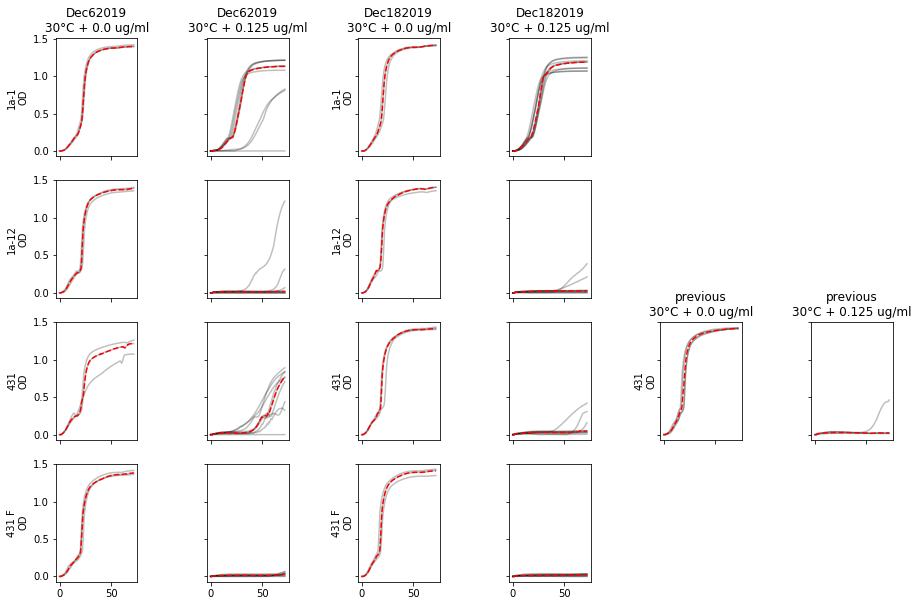

In [24]:
fig,ax = plt.subplots(len(_431.strain.unique()),6,
                      figsize=(15,10),sharex=True,sharey=True)
for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0) & 
                          (_431.compare=='Dec62019')].groupby('strain')):
    
    plt.sca(ax[i,0])
    plt.ylabel(k[0] + '\nOD')
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.0 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0.125) & 
                          (_431.compare=='Dec62019')].groupby('strain')):
    
    plt.sca(ax[i,1])
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.125 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
    

for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0) & 
                          (_431.compare=='Dec182019')].groupby('strain')):
    
    plt.sca(ax[i,2])
    plt.ylabel(k[0] + '\nOD')
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.0 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0.125) & 
                          (_431.compare=='Dec182019')].groupby('strain')):
    
    plt.sca(ax[i,3])
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.125 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
    
for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0) & 
                          (_431.compare=='previous')].groupby('strain')):
    
    plt.sca(ax[2,4])
    plt.ylabel(k[0] + '\nOD')
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.0 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
for i,k in enumerate(_431[(_431.temp==30) & 
                          (_431.amphB==0.125) & 
                          (_431.compare=='previous')].groupby('strain')):
    
    plt.sca(ax[2,5])
    plt.title(k[1].compare.unique()[0] + '\n30°C + 0.125 ug/ml' if i == 0 else None)
    plt.plot(timex,k[1][timepts].T.values,alpha=0.25,color='k');
    plt.plot(timex,k[1][timepts].median(axis=0),color='r',linestyle='--')
    
for i in [0,1,3]:
    for c in [4,5]:
        plt.sca(ax[i,c])
        plt.axis('off')
        
plt.subplots_adjust(wspace=0.85)

In [25]:
fdf[(fdf.temp==37)].strain.unique()

array(['431', 'XL280a', 'XL280alpha'], dtype=object)

In [26]:
fdf[~(fdf.amphB.isin([0.0,0.125])) & (fdf.temp==30)].strain.unique()

array(['431', 'XL280a', 'XL280alpha'], dtype=object)

In [28]:
savepath = '../FILES/'+file_path.split('/')[-1].split('.csv')[0]+'_baselined.csv'
savepath

'../FILES/Tecan-ssk1KO_baselined.csv'

In [29]:
## Save dataframe
fdf[(fdf.temp==30) & 
    (fdf.amphB.isin([0,0.125]))].to_csv(savepath)